## Project Goal:

1. Read the images and generate the train and test dataset (5 points)
2. Divide the data set into Train and validation data sets
3. Initialize & build the model (20 points)
4. Optimize the model (12 points)
5. Predict the accuracy for both train and validation data (10 points)
5. Use transfer learning method and build a model ( 10 points)
6. Compare the results of above models (3 marks)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_path = 'drive/My Drive/Projects/CNN'  #change dir to your project folder

In [0]:
root_path

'drive/My Drive/Projects/CNN'

In [0]:
from google.colab import files
files.upload() #this will prompt you to update the json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

Saving kaggle.json to kaggle.json
kaggle.json


In [0]:
#List datasets and competitions
!kaggle datasets list
!kaggle competitions list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          10205  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          11232  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           4817  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           5775  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In [0]:
#Search for datasets and competitions by name
!kaggle datasets list -s plant-seed
!kaggle competitions list -s plant-seedlings-classification

ref                                    title                           size  lastUpdated          downloadCount  
-------------------------------------  -----------------------------  -----  -------------------  -------------  
vbookshelf/v2-plant-seedlings-dataset  V2 Plant Seedlings Dataset       3GB  2018-12-13 14:20:52           3591  
sushanthd/plantseedlings               plant-seedlings                  5GB  2019-07-29 05:49:01              8  
heitao/plantseed                       plant-seed                       4KB  2019-08-16 23:29:30              3  
xalphahelix/plant-seedling-models      Plant Seedling Models            9MB  2018-03-25 11:02:18             31  
mehradaria/plantseedling               Plant Seedling Classification   51MB  2018-07-04 11:19:02             39  
santoshd3/crop-price-prediction        Crop Price Prediction          168KB  2019-07-31 19:24:18            244  
ref                             deadline             category    reward  teamCount  user

## Download the images and generate the train and test dataset

In [0]:
#Download required dataset / competition files to a folder of your choice
!kaggle competitions download -c plant-seedlings-classification -p /content/drive/My\ Drive/Projects/CNN


  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 696kB/s]
 94% 81.0M/86.0M [00:02<00:00, 27.4MB/s]
100% 86.0M/86.0M [00:02<00:00, 39.7MB/s]
100% 1.59G/1.60G [00:36<00:00, 36.5MB/s]
100% 1.60G/1.60G [00:36<00:00, 46.6MB/s]


In [0]:
import os
os.chdir('/content/drive/My Drive/Projects/CNN')  #change dir
#!mkdir train  #create a directory named train/
#!mkdir test  #create a directory named test/
!unzip -q train.zip #-d train/  #unzip data in train/
!unzip -q test.zip #-d test/  #unzip data in test/
!unzip sample_submission.csv.zip


replace train/Fat Hen/5bdfa3a44.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
replace test/c0461776c.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  sample_submission.csv.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from __future__ import print_function
import keras
from keras.backend import backend
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os
import sys
import cv2
from keras.utils import to_categorical
from subprocess import check_output
from keras.models import load_model
import matplotlib
import glob

Using TensorFlow backend.


In [0]:
# create generator
datagen = ImageDataGenerator()

In [0]:
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/My Drive/Projects/CNN/train', class_mode='categorical')
#val_it = datagen.flow_from_directory('/content/drive/My Drive/Projects/CNN/train', class_mode='categorical')
#test_it = datagen.flow_from_directory('/content/drive/My Drive/Projects/CNN/test')
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 4750 images belonging to 12 classes.
Batch shape=(32, 256, 256, 3), min=0.000, max=240.000


## Divide the data set into Train and validation data sets

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=360.,
    width_shift_range=.5,
    height_shift_range=.5,
    brightness_range=[.5,1],
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Projects/CNN/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data


validation_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Projects/CNN/train', # same directory as training data
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data


test_datagen = ImageDataGenerator(rescale=1./255)


Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


## Initialize & build the model 

In [0]:
batch_size = 32
num_classes = 12
epochs = 20
data_augmentation = True
#num_predictions = 20
input_shape = (256,256,3)

In [0]:
#Build the initial model

#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(128, kernel_size=(3, 3),padding='same',
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(256, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.2 probability 
model.add(Dropout(0.2,name='drop_1'))


model.add(Conv2D(64, (3, 3), padding='same', activation='relu',name='conv_3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))
model.add(Dropout(0.2,name='drop_2'))

#Flatten the layer
model.add(Flatten()) #feature map

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(64, activation='relu',name='dense_1'))

#Apply Dropout with 0.2 probability 
model.add(Dropout(0.2,name='drop_3'))

#Add Fully Connected Layer with 5 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Generate model summary

model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 128)     3584      
_________________________________________________________________
conv_2 (Conv2D)              (None, 254, 254, 256)     295168    
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 127, 127, 256)     0         
_________________________________________________________________
drop_1 (Dropout)             (None, 127, 127, 256)     0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 127, 127, 64)      147520    
_________________________________________________________________
max_2 (MaxPooling2D)         (None, 63, 63, 64)        0         
_________________________________________________________________
drop_2 (Dropout)             (None, 63, 63, 64)       

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [0]:
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 30)


Epoch 1/30
118/118 [==============================] - 294s 2s/step - loss: 2.5526 - acc: 0.1264 - val_loss: 2.4265 - val_acc: 0.1088
Epoch 2/30
118/118 [==============================] - 268s 2s/step - loss: 2.3407 - acc: 0.1942 - val_loss: 2.1500 - val_acc: 0.2820
Epoch 3/30
118/118 [==============================] - 265s 2s/step - loss: 2.1556 - acc: 0.2567 - val_loss: 2.0829 - val_acc: 0.2743
Epoch 4/30
118/118 [==============================] - 264s 2s/step - loss: 2.1093 - acc: 0.2672 - val_loss: 2.0579 - val_acc: 0.2798
Epoch 5/30
118/118 [==============================] - 264s 2s/step - loss: 2.0722 - acc: 0.2731 - val_loss: 1.9992 - val_acc: 0.2874
Epoch 6/30
118/118 [==============================] - 262s 2s/step - loss: 2.0407 - acc: 0.2811 - val_loss: 1.9872 - val_acc: 0.3071
Epoch 7/30
118/118 [==============================] - 262s 2s/step - loss: 2.0328 - acc: 0.2770 - val_loss: 1.9967 - val_acc: 0.2984
Epoch 8/30
118/118 [==============================] - 262s 2s/step - 

In [0]:
# evaluate model
score = model.evaluate_generator(validation_generator, steps=50)
score

[1.359437965565533, 0.5589161940393166]

In [0]:
# evaluate model
score = model.evaluate_generator(train_generator, steps=50)
score

[1.2951933693885804, 0.5725]

## Optimize the model

In [0]:
batch_size = 16
num_classes = 12
epochs = 20
data_augmentation = True
#num_predictions = 20
input_shape = (150,150,3)

#Build the model

#Initialize the model
model2 = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model2.add(Conv2D(64, kernel_size=(3, 3),padding='same',
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model2.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model2.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),name='max_1'))

#Apply Dropout with 0.2 probability 
model2.add(Dropout(0.2,name='drop_1'))


model2.add(Conv2D(128, (3, 3), padding='same', activation='relu',name='conv_3'))
model2.add(Conv2D(128, (3, 3), padding='same', activation='relu',name='conv_4'))
model2.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),name='max_2'))
model2.add(Dropout(0.2,name='drop_2'))


model2.add(Conv2D(256, (3, 3), padding='same', activation='relu',name='conv_5'))
model2.add(Conv2D(256, (3, 3), padding='same', activation='relu',name='conv_6'))
model2.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),name='max_3'))
model2.add(Dropout(0.2,name='drop_3'))

#Flatten the layer
model2.add(Flatten()) #feature map

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model2.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.2 probability 
model2.add(Dropout(0.2,name='drop_4'))


#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model2.add(Dense(64, activation='relu',name='dense_2'))

#Add Fully Connected Layer with 5 units and activation function as 'softmax'
model2.add(Dense(num_classes, activation='softmax',name='dense_3'))

#Generate model summary
model2.summary() 

#opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
#opt = optimizers.RMSprop(lr=0.001, rho=0.9)
#opt = optimizers.Adagrad(lr=0.01)
#opt = optimizers.Adadelta(lr=1.0, rho=0.95)
#opt = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)
model2.compile(optimizer=opt,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv_2 (Conv2D)              (None, 148, 148, 64)      36928     
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 73, 73, 64)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 73, 73, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 73, 73, 128)       73856     
_________________________________________________________________
conv_4 (Conv2D)              (None, 73, 73, 128)       147584    
_________________________________________________________________
max_2 (MaxPooling2D)         (None, 36, 36, 128)      

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30.,
    width_shift_range=.2,
    height_shift_range=.2,
    brightness_range=[.5,1],
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Projects/CNN/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data


validation_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Projects/CNN/train', # same directory as training data
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data


test_datagen = ImageDataGenerator(rescale=1./255)




Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [0]:
model2.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 100)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





237/237 [==============================] - 1894s 8s/step - loss: 2.4919 - acc: 0.1305 - val_loss: 2.4190 - val_acc: 0.1292
Epoch 2/100
237/237 [==============================] - 95s 400ms/step - loss: 2.2761 - acc: 0.2237 - val_loss: 2.0077 - val_acc: 0.3136
Epoch 3/100
237/237 [==============================] - 94s 399ms/step - loss: 1.9687 - acc: 0.3102 - val_loss: 1.8395 - val_acc: 0.3598
Epoch 4/100
237/237 [==============================] - 94s 398ms/step - loss: 1.8457 - acc: 0.3450 - val_loss: 1.7713 - val_acc: 0.3985
Epoch 5/100
237/237 [==============================] - 94s 398ms/step - loss: 1.7260 - acc: 0.3868 - val_loss: 1.6707 - val_acc: 0.4017
Epoch 6/100
237/237 [==============================] - 93s 394ms/step - loss: 1.6421 - acc: 0.4192 - val_loss: 1.4497 - val_acc: 0.5113
Epoch 7/100
237/237 [==============================] - 93s 393ms/step - loss: 1.478

In [0]:
model2.save('/content/drive/My Drive/Projects/CNN/model.h5')

In [0]:
model = load_model('/content/drive/My Drive/Projects/CNN/model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



## Predict the accuracy for both train and validation data

In [0]:
scores = model.evaluate_generator(train_generator,50) 
scores

[0.10898351227864624, 0.9625]

In [0]:
scores = model.evaluate_generator(validation_generator,50) 
scores

[0.2821713776886463, 0.9375]

## Check the classes of actual validation data and prediction on validation data

In [0]:
print(validation_generator.class_indices)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}


In [0]:
validation_generator.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [0]:
pred= model.predict_generator(validation_generator, 50)
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)
labels = (validation_generator.class_indices)
print (labels)
#labels2 = dict((v,k) for v,k in labels.items())
#print (labels2)
#predictions = [labels2[k] for k in predicted_class_indices]

#predictions = [key for key, value in labels2.items() if value == predicted_class_indices.any()]

#print(predicted_class_indices)
#print (labels)
#print (predictions)

[ 0  5  8  5  1  3  0  3 10  4  3 10  2 11 11  6  5  3  1  5  0  7  9  1
 11  6  8  3  6  1  5  1  8  0  2  0 10  7  3 11  3 10 10  5  8  1  8 10
  2  9  8  8  3  3  4  3  3  6  1  3 10  3  5  6  4  5  9  6  0  6 10  1
 11  3  8  8  6  6  5  9  6  6  8 11  3  6  3  8 10  0  5 10  5 10  7  9
  3  8  3 10  1  6  8  4  3  5  1  0  1  8  1  5  6  2  5  2  3 10  6  8
  4  5  3  5  6  9  3  5  8  3 10 10  3  8  6  6  0  1  8  0  6  6  4  6
  1 10  3  5  7  3 10  1  2 10  3  5  2  5  4  6  1 10  6 10  8  1  3  5
  1  6  6 10 11  9  5  5  8 10 10  3  6 11 11  0  7  8  2  5  6  9  5  3
  5  0  4  3  7  6  4  5  8  3 11  6  6 11  1  3 11  8  3  6 10  6 11  3
  1  8  5  6 10  3  8  0  3  7  9  9  8 10  6 10  1  0  7  6 11  3  5  6
  8 11  1  3 11  5  8 10  2  5  5  0  6  1  0 11  6 10  2  0  6  9  2  3
  4  5 10  5 10  3  5  1  1  2 11  1 10  6  7 10  3  8  8  6  3  0  9 10
  0  9  2 10  3  3 10  0  8  6  2  5  2  7  1 11 10  5  5  5  9  1  7  8
  0 10  6  8  8  6  0  9  3  9  8  1  0  6 11  8  6

## Use transfer learning to train and predict

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
#base_model = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
#base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
#Apply Dropout with 0.2 probability 
#x = (Dropout(0.2))(x)
#x = (Dense(64, activation='relu'))(x)
# and a logistic layer -- we have 12 classes
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
#    layer.trainable = False


# fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False


# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])





87916544/87910968 [==============================] - 8s 0us/step


In [0]:
# summarize
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
# train the model on the new data for a few epochs
history = model.fit_generator(train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 100)

Epoch 1/100
237/237 [==============================] - 882s 4s/step - loss: 1.9340 - acc: 0.3752 - val_loss: 1.6084 - val_acc: 0.5074
Epoch 2/100
237/237 [==============================] - 103s 436ms/step - loss: 1.4274 - acc: 0.5218 - val_loss: 1.1213 - val_acc: 0.6369
Epoch 3/100
237/237 [==============================] - 103s 436ms/step - loss: 1.2462 - acc: 0.5847 - val_loss: 1.2223 - val_acc: 0.6198
Epoch 4/100
237/237 [==============================] - 103s 436ms/step - loss: 1.1024 - acc: 0.6216 - val_loss: 1.0787 - val_acc: 0.6702
Epoch 5/100
237/237 [==============================] - 104s 439ms/step - loss: 1.0128 - acc: 0.6554 - val_loss: 0.9272 - val_acc: 0.7186
Epoch 6/100
237/237 [==============================] - 103s 436ms/step - loss: 0.9319 - acc: 0.6786 - val_loss: 0.9310 - val_acc: 0.7025
Epoch 7/100
237/237 [==============================] - 103s 435ms/step - loss: 0.9209 - acc: 0.6786 - val_loss: 0.8844 - val_acc: 0.7111
Epoch 8/100
237/237 [=======================

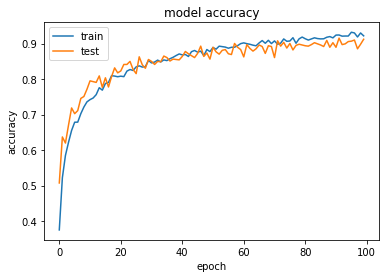

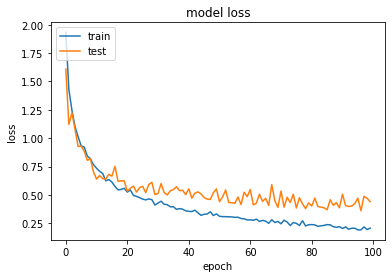

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate_generator(train_generator,50) 
scores

[0.25803041173145175, 0.9425]

In [0]:
scores = model.evaluate_generator(validation_generator,50) 
scores

[0.44696411647833884, 0.90375]

In [0]:
validation_generator.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [0]:
pred= model.predict_generator(validation_generator, 50)
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)
labels = (validation_generator.class_indices)
print (labels)

[ 7  7  1  0  3  3  3  3  6 10  5  5  8  3  3 10  5  6  7  3  6  2  8 11
  3  8  5  1  1  8  8  3  3  0  1  1  8  5  6  4  6  6  1 11  0  8  7  6
  9  5  4  0  9  3  6 10  0  2 10  1  1  1  6  8  6  0  7 11  3  7  9 10
  7  6  6  6  9  4  5  1  3  5 10  2 11  5  3  6  7  9 11  8 10 11  4  6
  6 11  8  8 10  7  6  3  3 10  5 11  6  5  3  6  5  8 11  3  6  3  6 11
  6  4  2  5  8  6 11  1  9 11  6  1  3  4  3  2  1  6  5  6  4  1  3  0
 11  0  5  6 10  0  6  5  6  2  8  6  3  5  3 11  8  9  5  5  8  8 11 11
  3  8  3  3  5  6 10  9 11  5  6  6  1  6 11  3  0 11  5  6  3 10  6  3
  2  8  6  1  3  3  4  3  2  4  1  9  5  1  5  3  8  3 10  4  2  6  5  5
 11  7  3  3  8  8  7  5  6 10 10  8  1  9  5  8  1  7 10  3  3  7  6  2
  6 10  1  5  9  4  6  7  3  9  1  3  9  4  1  6  7  1 11  5  3  8  6  4
  7  3 11  3  6  1 10  3  1  5  5 11  3 11 11  3  3 10  9  6  8  4  1 11
  2  6 10  7  2  8  3  6  9  6  1  6  8 10 11  1  3  8  8 11  7  4  8  7
  9  9  8  1  2  6  9  2  5  6  1  1 10 11  7 10  1

## Comparison

1. Model take longer time to get trained, Transfer learing even took longer for each epoch
2. Accuracy of the model with transfer learning is in same range with CNN model without Tr Learning. Not sure what else needs to be done. Please advise.

## Get output class for test data 

In [0]:
def read_img(img_list, img):
    n = cv2.imread(img, 1)
    arr = img_to_array(n)  
    print(arr.shape)
    arr = cv2.resize(arr, (150,150)) #Numpy array with shape (HEIGHT, WIDTH,3)
    print(arr.shape)
    img_list.append(arr)
    return img_list

#path = glob.glob("/content/drive/My Drive/Projects/CNN/test/ffc6f8527.png") #or jpg
#path = glob.glob("/content/drive/My Drive/Projects/CNN/train/Black-grass/f5ca3d442.png") 
path = glob.glob("/content/drive/My Drive/Projects/CNN/train/Maize/ff4b55219.png") 

list_ = []

cv_image = [read_img(list_, img) for img in path]

(383, 383, 3)
(150, 150, 3)


In [0]:
cv_image = np.array(cv_image)
cv_image.shape

(1, 1, 150, 150, 3)

In [0]:
cv_image = np.squeeze(cv_image, axis=0)

In [0]:
cv_image.shape

(1, 150, 150, 3)

In [0]:
cv_image = (cv_image) / 255.0

In [0]:
yFit = model.predict(cv_image, verbose=1)
yFit

1/1 [==============================] - 0s 41ms/step


array([[4.5880071e-05, 1.5040155e-01, 2.9502070e-01, 1.4537032e-03,
        3.2706201e-04, 6.3517421e-02, 1.4701315e-05, 4.7226670e-01,
        3.8576207e-05, 1.1027932e-04, 1.3519833e-02, 3.2835854e-03]],
      dtype=float32)

In [0]:
pred= model.predict(cv_image, verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

1/1 [==============================] - 0s 31ms/step
[7]


In [0]:
print(validation_generator.class_indices)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}


# It predicted correctly the image of a Maize seedling.

# This is the actual image ->

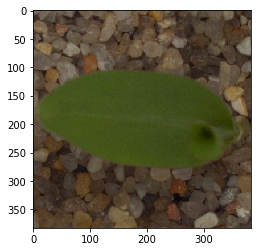

In [0]:
#from keras.preprocessing.image import load_img
import skimage.io as io
# load the image
#img = load_img("/content/drive/My Drive/Projects/CNN/train/Maize/ff4b55219.png")

#img.show()

img = io.imread("/content/drive/My Drive/Projects/CNN/train/Maize/ff4b55219.png")
plt.imshow(img)
plt.show()